2. 
    a. Calcular los motifs de hasta 5 nodos de la subred definida en el punto 1.c.
    
    b. Calcular el promedio y desvío estandar de los motifs de una red de baseline. Calcular el significant profile de la red, y hacer un gráfico.
    
    c. Intentar dar con una explicación del resultado obtenido en el punto anterior [+1 punto].

**[4 puntos]** *(sin contar 2.c)*

In [1]:
import networkx as nx
import pandas as pd

In [2]:
net = pd.read_csv('../data/subgraph.csv')

In [3]:
G = nx.from_pandas_edgelist(net,'Origen','Destino')

In [4]:
import sys
sys.path.append('../social-networks-utils')
from motifs.calculos import calcular_motifs, significance_profile, motif_grafo_eleatorios
from metricas import distribucion_grados
from modelos import configuration_model
from motifs.graficos import graficar_significant_profile

In [5]:
MAX_NODOS_MOTIFS = 5
motifs = calcular_motifs(G, MAX_NODOS_MOTIFS)
print(motifs)

[  6767   2160  35791  29980   1972  52722  21829   6045 105359 307703
  82477 231338 154949 259346   2809  36856 353316  50223 219685   1730
  31693  72409 224009 167290  14795 188349  14597  65421  11833]


In [6]:
dist = distribucion_grados(G)
promedios, stds = motif_grafo_eleatorios(lambda: configuration_model(dist), MAX_NODOS_MOTIFS, iters=20)
SP = significance_profile(motifs, promedios, stds)

Iteracion 1
Iteracion 2; anterior: 712.75 segs
Iteracion 3; anterior: 745.42 segs
Iteracion 4; anterior: 819.96 segs
Iteracion 5; anterior: 700.59 segs
Iteracion 6; anterior: 724.40 segs
Iteracion 7; anterior: 686.31 segs
Iteracion 8; anterior: 745.28 segs
Iteracion 9; anterior: 743.83 segs
Iteracion 10; anterior: 775.17 segs
Iteracion 11; anterior: 700.48 segs
Iteracion 12; anterior: 784.73 segs
Iteracion 13; anterior: 761.16 segs
Iteracion 14; anterior: 876.08 segs
Iteracion 15; anterior: 779.40 segs
Iteracion 16; anterior: 802.42 segs
Iteracion 17; anterior: 825.54 segs
Iteracion 18; anterior: 823.79 segs
Iteracion 19; anterior: 811.55 segs
Iteracion 20; anterior: 753.29 segs


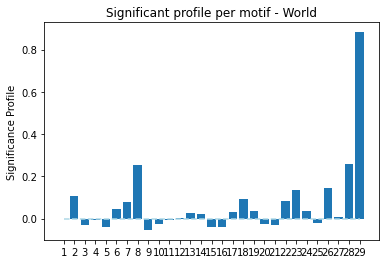

In [7]:
graficar_significant_profile(SP, 'World')

Claramente hay varios subgrafos que se mantiene poco semejante a lo esperado. Hay varios subgrafos que estan sobrerepresentados, sobretodo el 8, 28 y 29. Son los subgrafos que estan muy conectados entre todos, lo cual tiene sentido si estamos hablando de una red de vuelos (donde sería deseable poder llegar desde un mismo nodo a varios países sin hacer combinaciones). 